# Github Repo Classification


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn

import sys
import os

from main import aggregate_data
from metrics.githubMetrics import GithubMetrics, metricCollection
from importer.testDataImporter import TestDataImporter

## Data Aggregation

In [2]:
importer = TestDataImporter('data/testset.csv')
data = aggregate_data(importer.trainset.repos + importer.testset.repos)
y_data = np.array(importer.trainset.classification + importer.testset.classification)
data[:5]

,repo,forks_count,file_folder_ratio,avg_folder_depth,repo_size,html_count,file_count,avg_entropy,edu_mail_ratio,is_io_page,watcher_count,open_issue_count,up_to_dateness
0,https://github.com/mpv-player/mpv,646,9.661538,2.250000,77702,0,628,0.607567,0.005291,0,4769,348,2.605221e+04
1,https://github.com/AllThingsSmitty/jquery-tips...,438,2.120000,2.625000,252,0,53,0.606200,0.000000,0,3846,3,1.104032e+07
2,https://github.com/Hengjie/pdf.js,0,7.064865,2.173913,59299,33,1307,0.691902,0.011194,0,0,0,3.952726e+06
3,https://github.com/Nameless13/learngit,0,3.739583,5.316667,266,0,359,0.599076,0.000000,0,0,0,2.046372e+06
4,https://github.com/Kozlov-V/TSMessages,0,4.820513,3.784314,2012,0,376,0.611392,0.024390,0,0,0,6.320647e+07


## Visualizations

we want to compare stuff

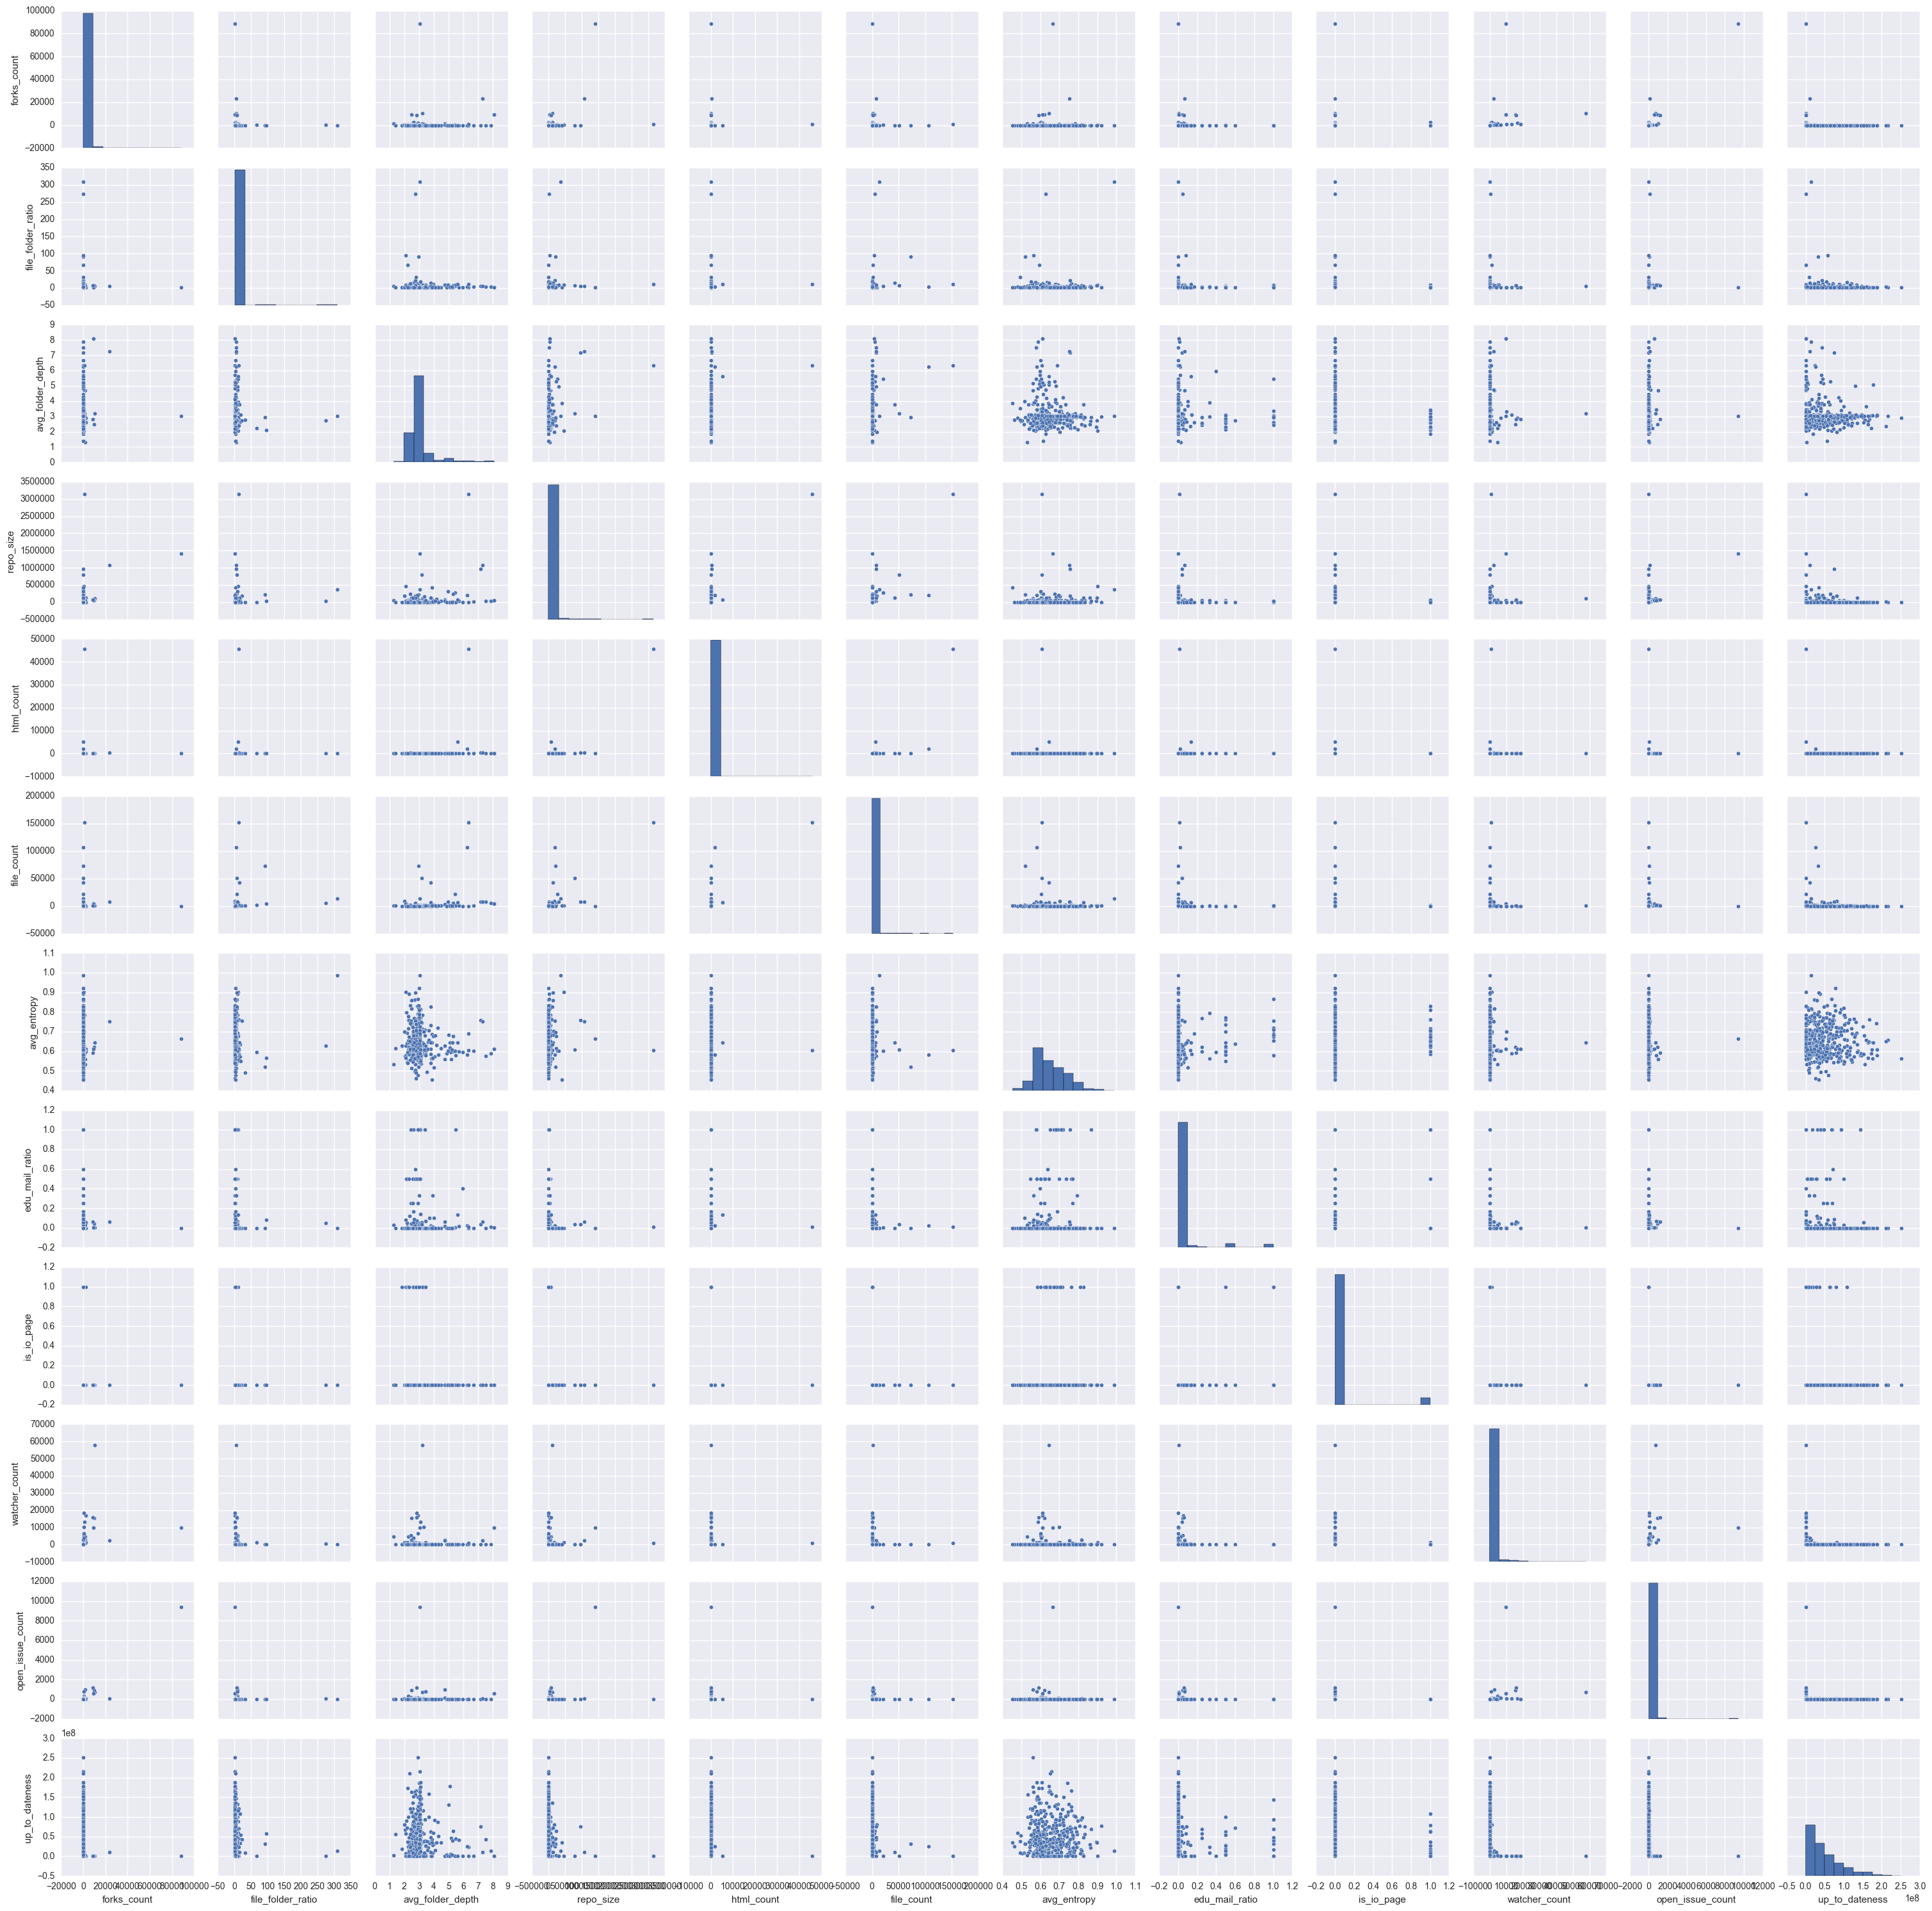

In [3]:
sbn.pairplot(data)

In [4]:
#norm_data = data
metric_list = list(metricCollection.keys())
#for metric in metric_list:
#    print(data[metric].describe())

In [5]:
data.columns

Index(['repo', 'forks_count', 'file_folder_ratio', 'avg_folder_depth',
       'repo_size', 'html_count', 'file_count', 'avg_entropy',
       'edu_mail_ratio', 'is_io_page', 'watcher_count', 'open_issue_count',
       'up_to_dateness'],
      dtype='object')

In [6]:
# normalize distribution
norm_data = pd.DataFrame()
for metric in metric_list:
    norm_data[metric] = np.log(data[metric] + 1)
    norm_data[metric] = (norm_data[metric] - norm_data[metric].min()) / (norm_data[metric].max() - norm_data[metric].min())

norm_data['avg_entropy'] = data['avg_entropy']
norm_data[:5]

,forks_count,file_folder_ratio,avg_folder_depth,repo_size,html_count,file_count,avg_entropy,edu_mail_ratio,is_io_page,watcher_count,open_issue_count,up_to_dateness
0,0.568263,0.330250,0.253733,0.752535,0.000000,0.405086,0.607567,0.007613,0.0,0.772247,0.639894,0.163231
1,0.534210,0.086028,0.333086,0.369789,0.000000,0.138886,0.606200,0.000000,0.0,0.752640,0.151507,0.714940
2,0.000000,0.274775,0.236519,0.734472,0.328676,0.484467,0.691902,0.016060,0.0,0.000000,0.000000,0.621259
3,0.000000,0.169127,0.736634,0.373389,0.000000,0.344582,0.599076,0.000000,0.0,0.000000,0.000000,0.561216
4,0.000000,0.209958,0.534729,0.508392,0.000000,0.349585,0.611392,0.034765,0.0,0.000000,0.000000,0.874077


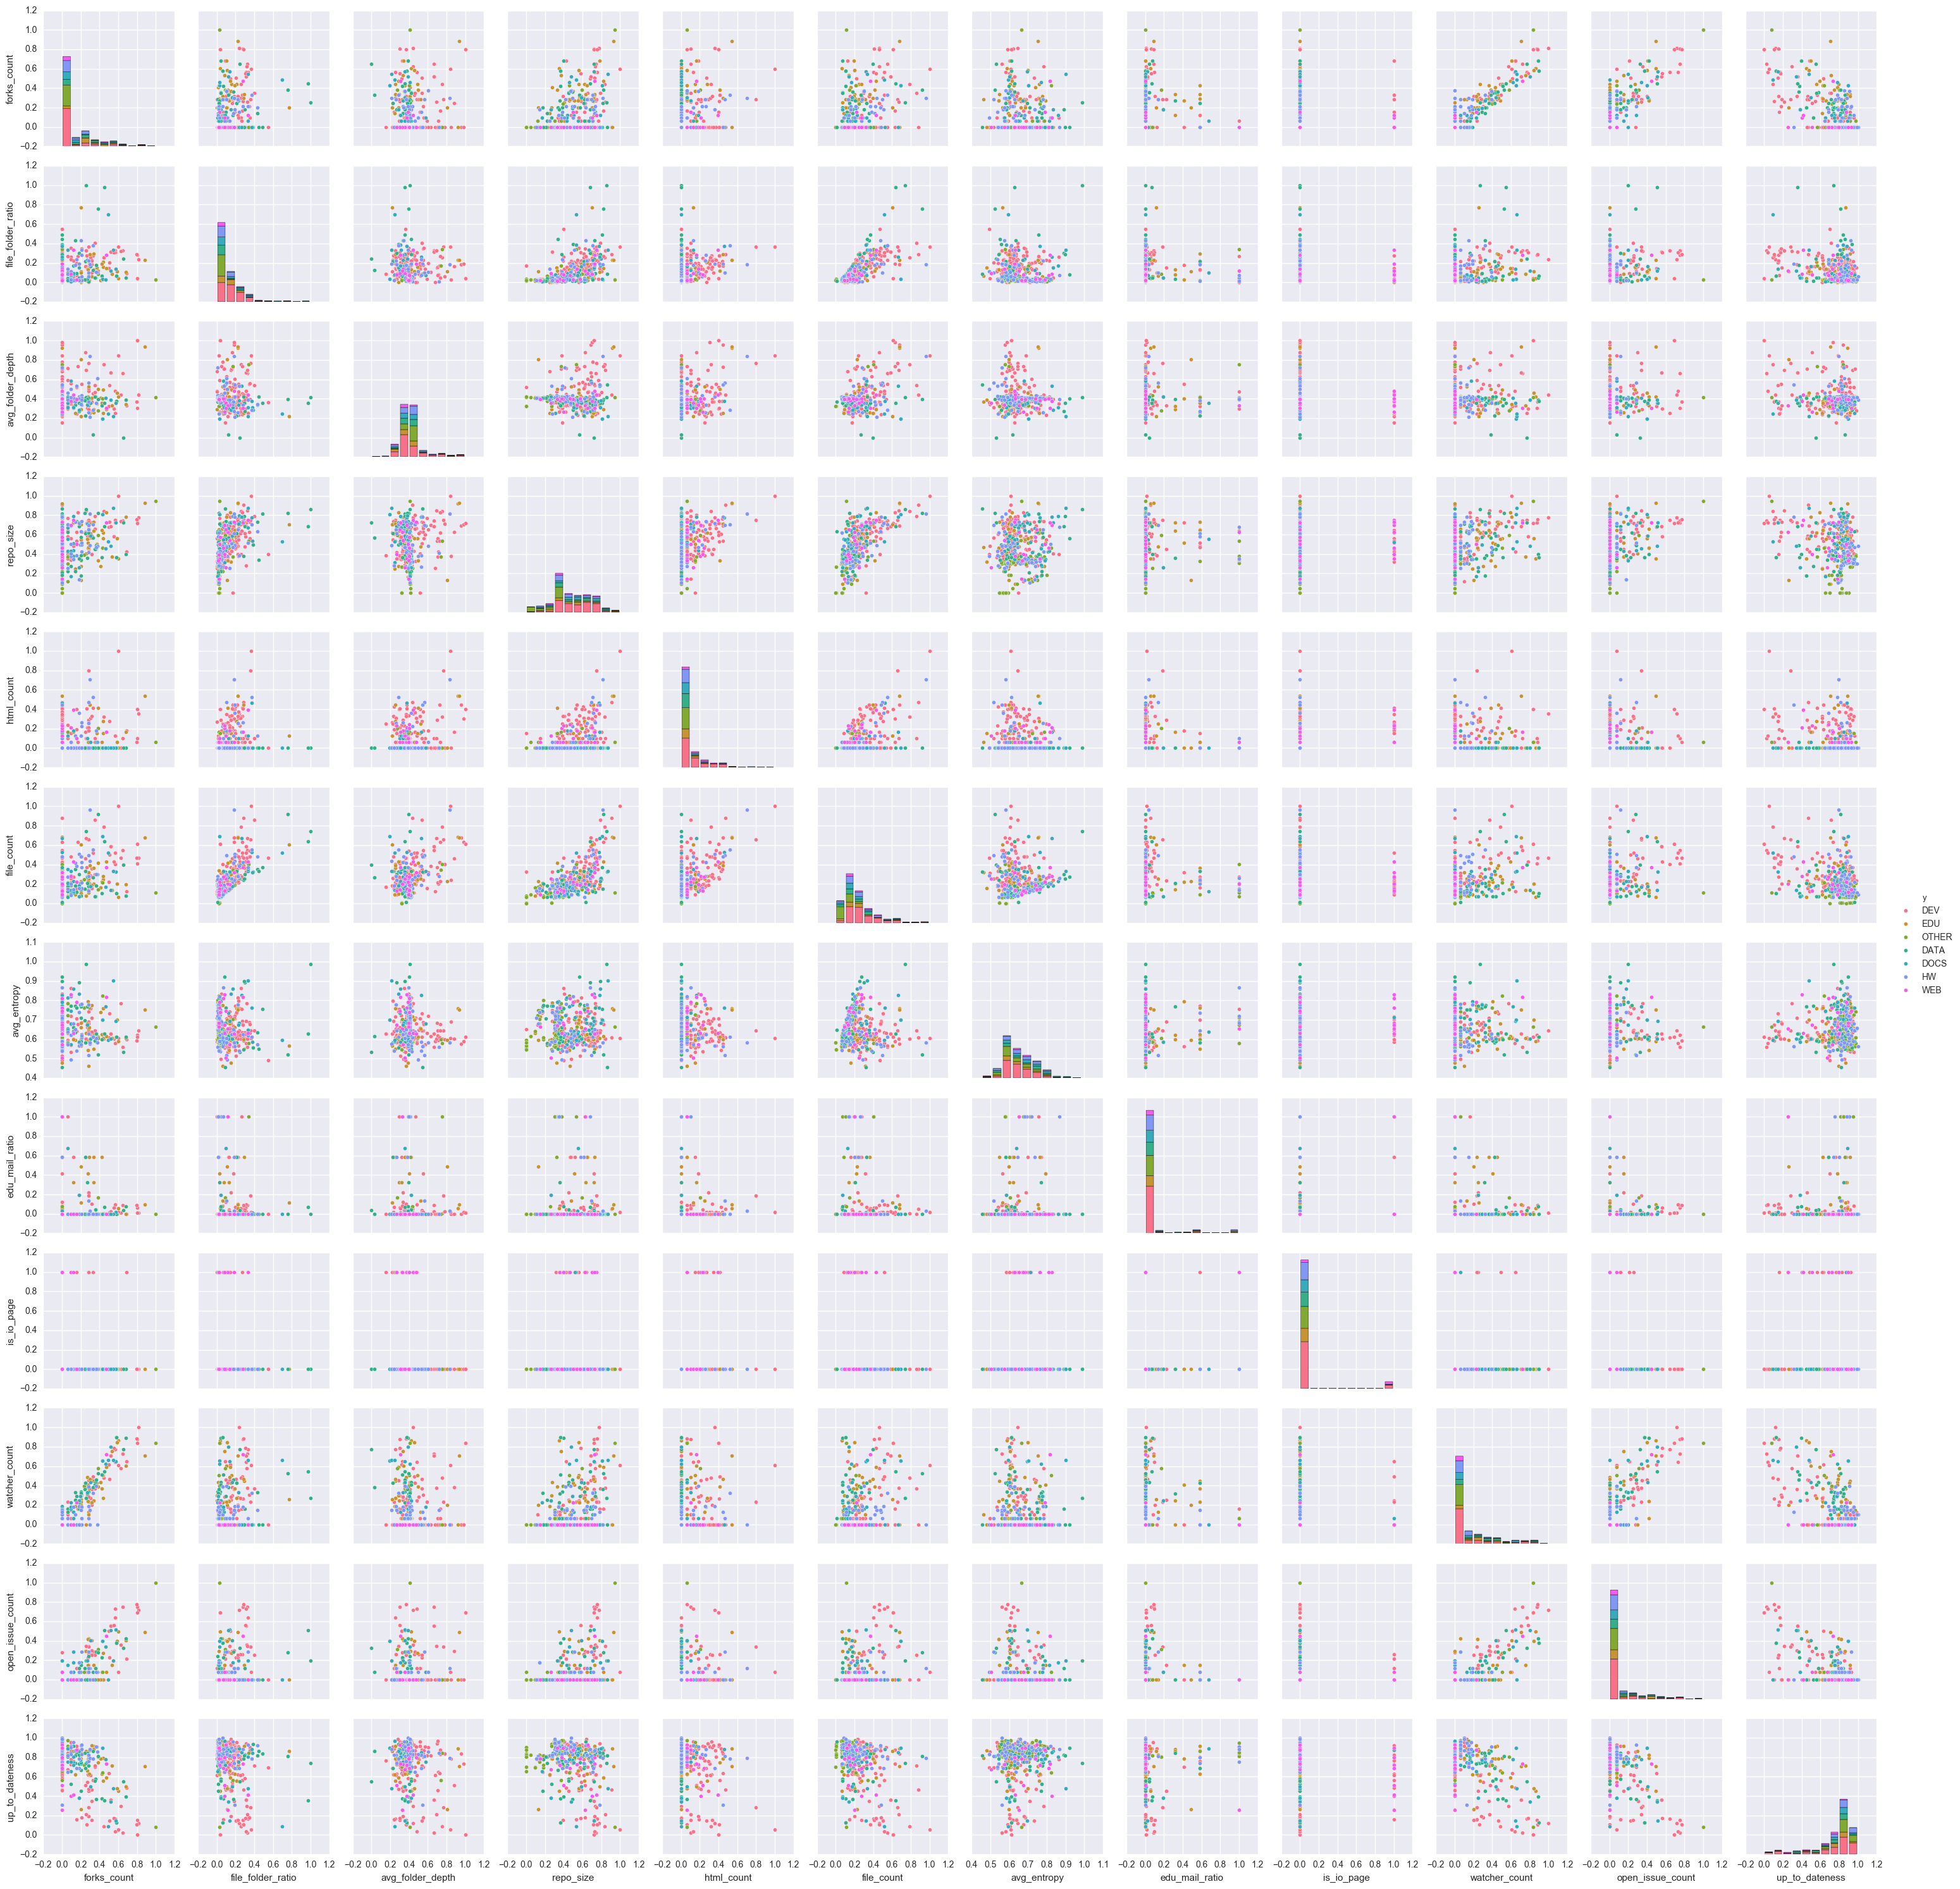

In [7]:
plot_data = norm_data
plot_data['y'] = y_data
pplot = sbn.pairplot(norm_data, hue='y')
pplot.savefig('colored_pairplot.png')

In [8]:
categories = pd.Series(importer.trainset.classification + importer.testset.classification)
categories[norm_data['file_folder_ratio'] > 0.5]
data[norm_data['file_folder_ratio'] > 0.5]
pd.concat([categories[norm_data['file_folder_ratio'] > 0.5], data[norm_data['file_folder_ratio'] > 0.5]], axis=1)


,0,repo,forks_count,file_folder_ratio,avg_folder_depth,repo_size,html_count,file_count,avg_entropy,edu_mail_ratio,is_io_page,watcher_count,open_issue_count,up_to_dateness
56,DATA,https://github.com/recalbox/recalbox-gamelists,17,308.977778,3.043478,373046,0,13904,0.987696,0.000000,0,19,5,1.412706e+07
250,DATA,https://github.com/tategallery/collection,77,91.664987,2.962677,221119,0,72782,0.522205,0.000000,0,321,12,3.224559e+07
304,EDU,https://github.com/XQueryInstitute/Course-Mate...,9,95.585366,2.107143,36330,3,3919,0.564987,0.083333,0,16,0,5.771860e+07
322,DOCS,https://github.com/github/dmca,264,66.518519,2.222222,2830,0,1796,0.594104,0.000000,0,1373,0,1.174190e+04
397,DEV,https://github.com/Top-Ranger/bakery,0,31.305556,2.772727,371,0,1127,0.492186,0.000000,0,0,0,9.017049e+06
407,DATA,https://github.com/OpenExoplanetCatalogue/open...,167,274.350000,2.750000,27762,0,5487,0.627682,0.050000,0,397,101,2.066962e+05


In [9]:
#fig = plt.figure(figsize=(16,8))
def bar_plots(data):
    f, axarr = plt.subplots(len(metricCollection), sharex=True, figsize=(16,20))

    index = np.arange(len(data))
    for i, metric in enumerate(metricCollection):
        ax = axarr[i]
        ax.bar(index,
            data[metric],
            0.7, # barwdith
            label=metric
        )
        ax.set_title(metric)

    plt.xticks(index + 0.35, index)
    None

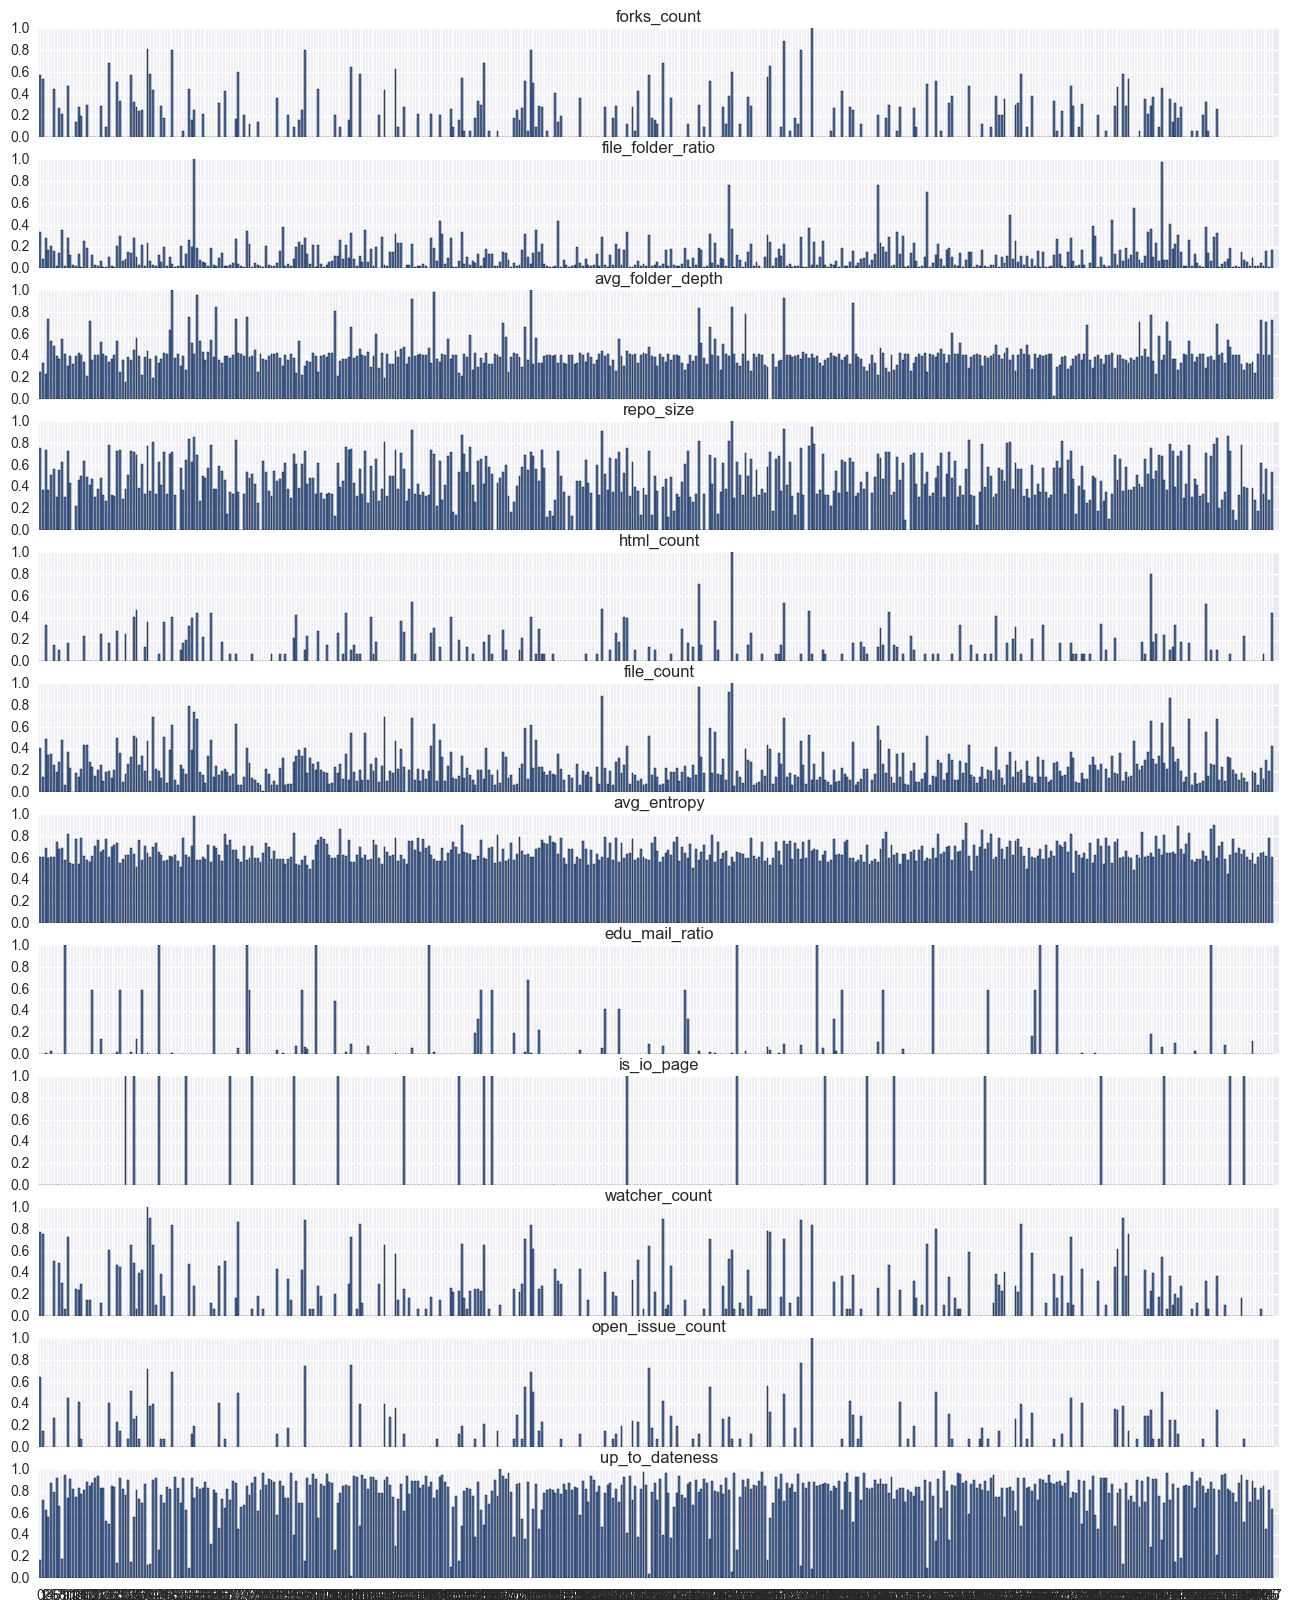

In [10]:
bar_plots(norm_data)

In [22]:
def boxplots(data):
    h = int(len(metric_list) / 2) + 1
    fig, axes = plt.subplots(nrows=h, ncols=2, figsize=(16, 20))
    for i, metric in enumerate(metric_list):
        x = i % 2
        y = int(i / 2)
        data_per_metric = data[metric]
        
        classes = np.unique(y_data)
        data_per_class = []
        for cls in classes:
            data_per_class.append(data_per_metric[y_data == cls])
        
        axes[y, x].boxplot(data_per_class, labels=classes)
        axes[y, x].set_title(metric)
        axes[y, x].set_ylim([-0.2, 1.1])

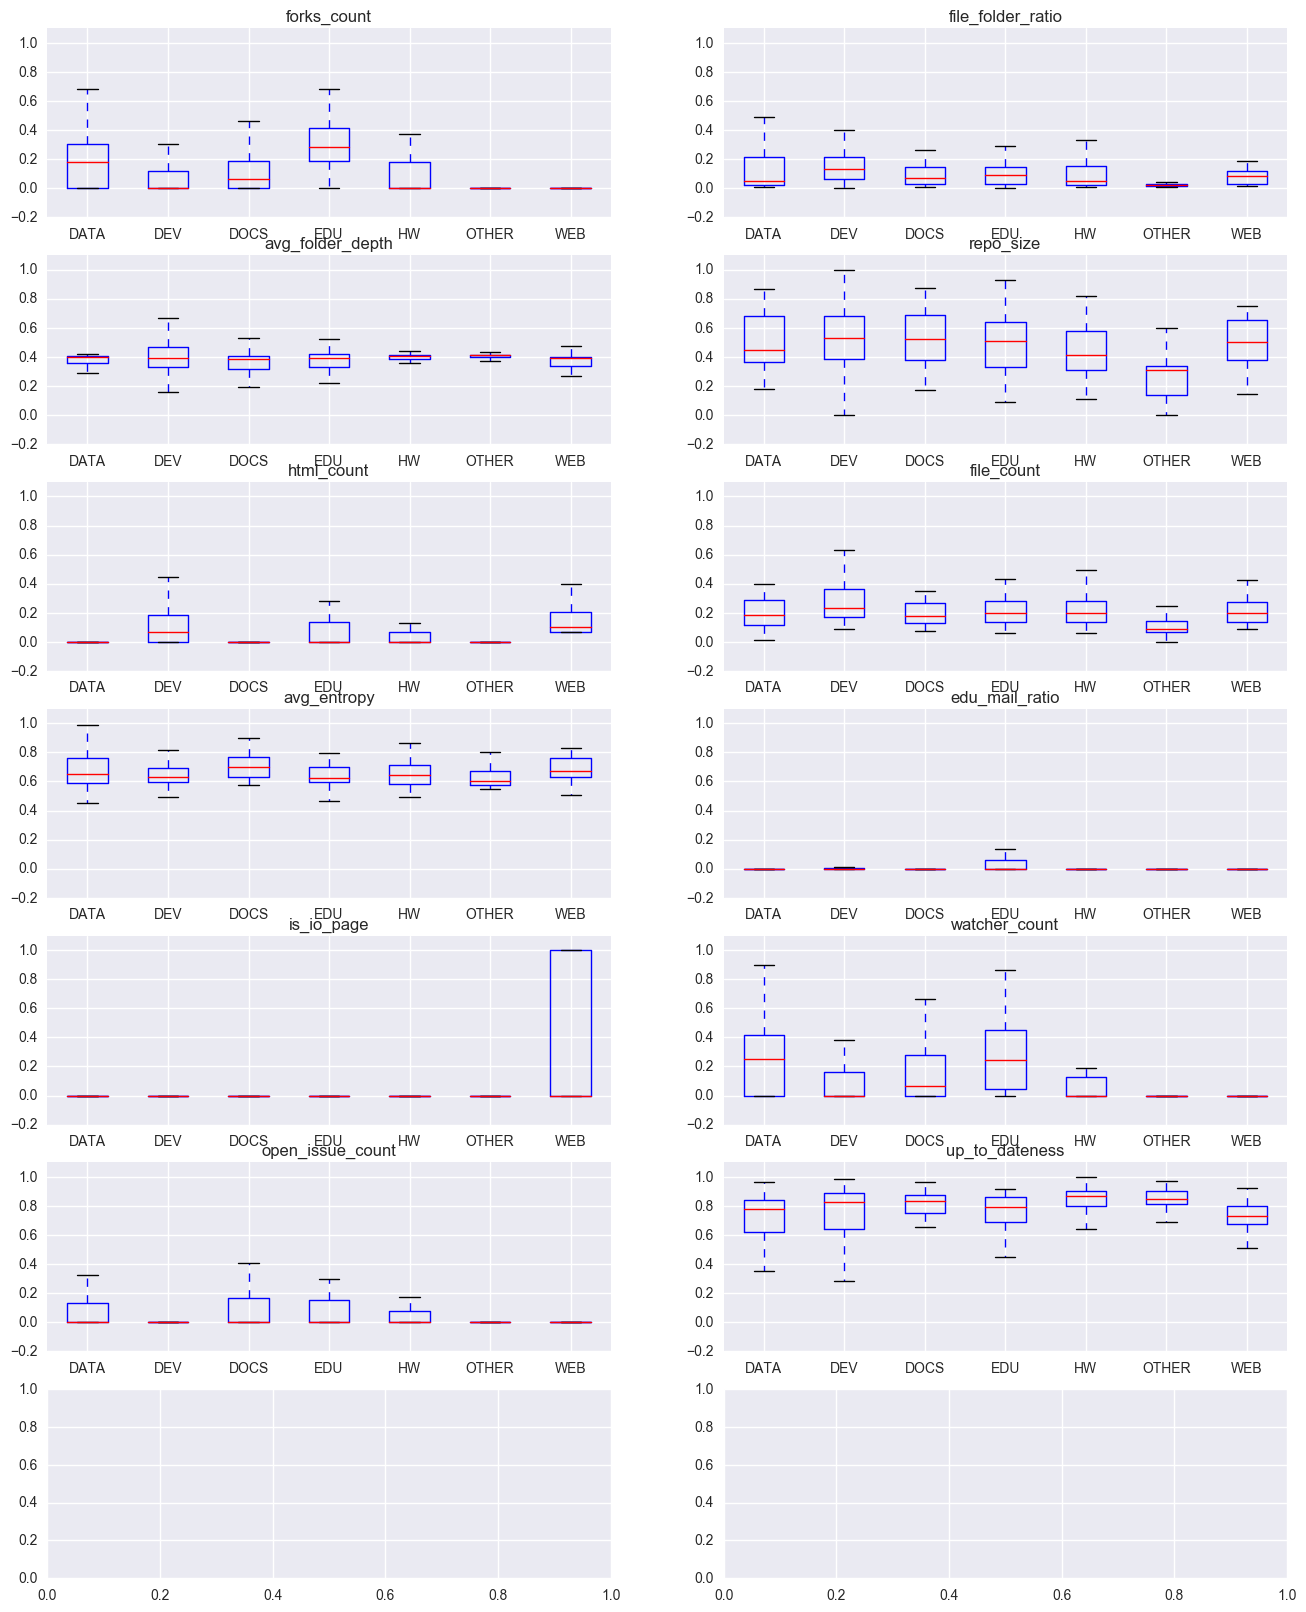

In [23]:
boxplots(norm_data)

## TSNE

In [13]:
import sklearn
import sklearn.manifold

In [14]:
categories = np.array(importer.trainset.classification + importer.testset.classification)
categories_nodev = categories[categories != 'DEV']
X = norm_data[categories != 'DEV']

In [15]:
model = sklearn.manifold.TSNE(n_components=2, random_state=0)
#np.set_printoptions(suppress=True)
vis_data = model.fit_transform(X)

# plot the result
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]


cats = np.unique(categories_nodev)
cat_translate = dict(zip(cats, np.arange(len(cats))))
    
color_mapping = [cat_translate[category] for category in categories_nodev]

plt.scatter(vis_x, vis_y, c=color_mapping, cmap=plt.cm.get_cmap("jet", len(cats)))
plt.colorbar()
cat_translate

ValueError: could not convert string to float: 'EDU'

In [ ]:
t = np.ones((5, 6)) * np.arange(6)
t = t.flatten()
u = np.unique(t)
pos = np.argwhere(t == u[0]).transpose()[0]
t[pos]